## Quinine Standard Validation

### Sample Preparation and Data Collection
---

A 1 ppm quinine stock solution was prepared by Deanna. We diluted this 1/20 to a concentration of 50 ppb with 0.050 M H2SO4. An unknown sample and control sample were prepared for standard addition in the following samples.

1. Blank (0.050 M H2SO4) 
2. 5 mL diluted unknown
3. 5 mL diluted unknown + 1 mL 50.00 µg/L quinine
4. 5 mL diluted unknown + 2 mL 50.00 µg/L quinine
5. 5 mL diluted unknown + 3 mL 50.00 µg/L quinine
6. 5 mL diluted unknown + 4 mL 50.00 µg/L quinine
7. 5 mL diluted control
8. 5 mL diluted control + 1 mL 50.00 µg/L quinine
9. 5 mL diluted control + 2 mL 50.00 µg/L quinine
10. 5 mL diluted control + 3 mL 50.00 µg/L quinine
11. 5 mL diluted control + 4 mL 50.00 µg/L quinine

Each sample was QS'd to 10 mL in a scintillation vial prior to fourescence measurement.

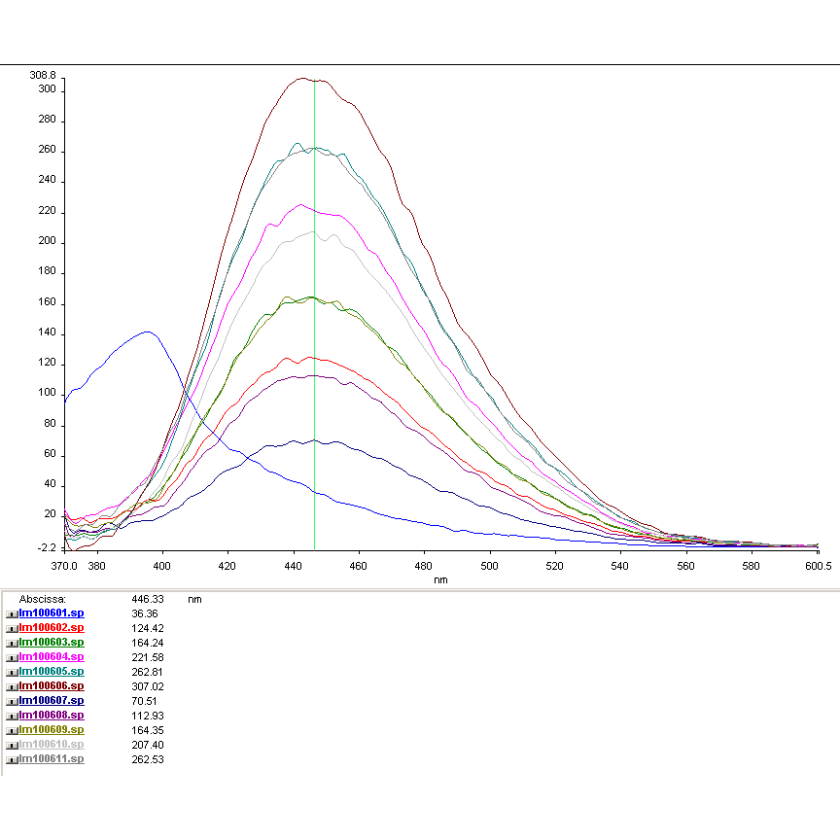

In [1]:
# Lets look at our png snip from the instrument computer
library(png)
img <- readPNG("/home/luke/data/IM/QuinineCheckF2017.png")
grid::grid.raster(img)

In [2]:
# Since this was simply a screen shot we need to enter the data before performing some regression analysis.
blank <- 36.36
unknown <- c(124.42,164.24,221.58,262.81,307.02)
control <- c(70.51,112.93,164.35,207.40,262.53)
Q <- data.frame(unknown,control)
print(Q)

  unknown control
1  124.42   70.51
2  164.24  112.93
3  221.58  164.35
4  262.81  207.40
5  307.02  262.53


### Standard Addition
---

In [3]:
# Each addition of 1 mL of 50 µg/L in a total volume of 10 mL gives
50*(1/10) # in µg/L

# so we can add a column to our data.frame that will act as our x-axis, "Concentration of Quinine Standard Added"
conc_added <- c(0,5,10,15,20)
Q <- data.frame(conc_added,Q)
print(Q)

[1] 5

  conc_added unknown control
1          0  124.42   70.51
2          5  164.24  112.93
3         10  221.58  164.35
4         15  262.81  207.40
5         20  307.02  262.53


In [6]:
library(ggplot2)
library(reshape)

# melt our data frame for easy plotting
Q.melt <- melt(Q, id="conc_added")
Q.melt

conc_added,variable,value
0,unknown,124.42
5,unknown,164.24
10,unknown,221.58
15,unknown,262.81
20,unknown,307.02
0,control,70.51
5,control,112.93
10,control,164.35
15,control,207.40
20,control,262.53


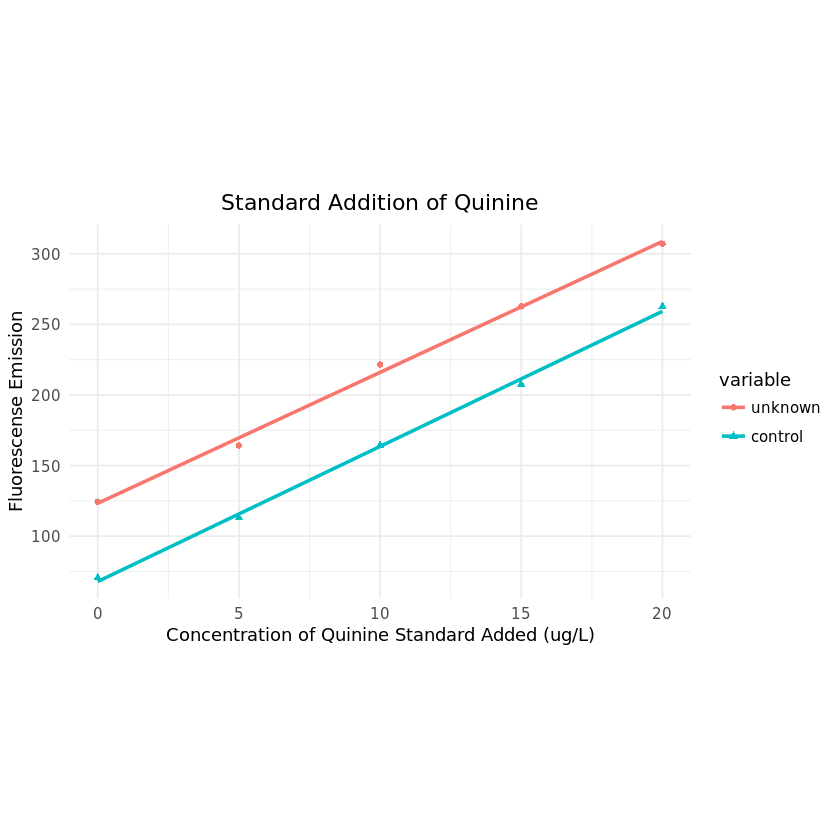

In [33]:
theme_set(theme_minimal())
ggplot(Q.melt, aes(x = conc_added, y = value, color = variable, shape = variable)) + 
    geom_point() + 
    stat_smooth(method = 'lm', se=F) + # se=F removes weird grey bars
    xlab("Concentration of Quinine Standard Added (ug/L)") +
    ylab("Fluorescense Emission") +
    ggtitle("Standard Addition of Quinine", subtitle = NULL) +
    theme(plot.title = element_text(hjust = 0.5)) +
    coord_fixed(ratio = 0.05)


In [35]:
# Run regression models with lm()
R.control <- lm(Q$conc_added ~ Q$control)
R.unknown <- lm(Q$conc_added ~ Q$unknown)

R.control$coefficients
R.unknown$coefficients

# you can also get more information than you need
summary(R.control)
summary(R.unknown)

(Intercept)   Q$control 
  -7.057482    0.104299

(Intercept)   Q$unknown 
-13.2190849   0.1074888


Call:
lm(formula = Q$conc_added ~ Q$control)

Residuals:
       1        2        3        4        5 
-0.29664  0.27899 -0.08407  0.42586 -0.32414 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.057482   0.457322  -15.43 0.000591 ***
Q$control    0.104299   0.002584   40.37 3.34e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3913 on 3 degrees of freedom
Multiple R-squared:  0.9982,	Adjusted R-squared:  0.9976 
F-statistic:  1630 on 1 and 3 DF,  p-value: 3.344e-05



Call:
lm(formula = Q$conc_added ~ Q$unknown)

Residuals:
       1        2        3        4        5 
-0.15467  0.56512 -0.59828 -0.03005  0.21787 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.219085   0.768398  -17.20 0.000428 ***
Q$unknown     0.107489   0.003403   31.58 6.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4999 on 3 degrees of freedom
Multiple R-squared:  0.997,	Adjusted R-squared:  0.996 
F-statistic: 997.5 on 1 and 3 DF,  p-value: 6.975e-05


In [34]:
# From the absolute value of the x-intercept of each (e.g. R.control$coefficients) we can calculate the concentration
control <- round(abs(R.control$coefficients[1]),4)
unknown <- round(abs(R.unknown$coefficients[1]),4)

# µg/L is already in ppb, so we just need to account for our 1/2 dilution when we prepared our 10 mL solutions and
# our 1/25 dilution preparing our unknown and control...
control*2*25
unknown*2*25

(Intercept) 
    352.875

(Intercept) 
    660.955

## Results
---
## Control: 0.3529 ppm
## Unknown: 0.6610 ppm